<a href="https://colab.research.google.com/github/Rique-Borges/Exercicio-Datawarehouse-Datalake/blob/main/EXEMPLO_DATAWAREHOUSE_DATALAKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Insere 600 dados gerados aleatóriamente na variável "produtos", com os atributos 'nome', e 'categoria'.
num_produtos = 600
produtos = {
    'produto_id' : range(1, num_produtos + 1),
    'nome': [f'Produto {i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Carrega os dados contidos na variável "produtos" em uma Dataframe
df_produtos = pd.DataFrame(produtos)

# Insere 1000 dados gerados aleatóriamente na variável "produtos", com os atributos 'data'
num_vendas = 1000  # Define a quantidade de itens que serão gerados na variável "data_vendas"
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas),  # Gera datas aleatórias em 30 dias a partir de 2024-01-01 e as insere na variável num_vendas
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas),  # Gera números aleatórios entre 50 e 200 e insere na variável num_vendas
    'valor_total': np.random.randint(1000, 10000, num_vendas)  # Gera números aleatórios entre 1000 e 10000 e insere na variável num_vendas
}

# Transformar os dados contidos na variável "data_vendas" em uma Dataframe
df_vendas = pd.DataFrame(data_vendas)

# Converter os dados contidos na variavel "df_vendas" e na variável "df_produtos" para dois arquivos .csv
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

# Carrega e retorna os dados contidos nos arquivos "vendas.csv" e "produtos.csv" em uma DataFrame
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

# Junta os dados das DataFrames "df_vendas" e "df_produtos" na variável "df_merge"
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Converte os arquivos contidos na "df_merge" para um arquivo .csv  chamado "data_warehouse.csv"
df_merge.to_csv('data_warehouse.csv', index=False)

# Carrega o .csv em uma DataFrame e printa os dados contidos na data warehouse "data_warehouse.csv"
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteúdo do Data Warehouse")
print(df_warehouse)

Conteúdo do Data Warehouse
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-16         458         169         5997  Produto 458       Roupas
1    2024-04-07         244         103         6244  Produto 244    Alimentos
2    2024-04-16         244         140         3888  Produto 244    Alimentos
3    2024-04-14         244         103         6291  Produto 244    Alimentos
4    2024-04-15         290         196         4298  Produto 290  Eletrônicos
..          ...         ...         ...          ...          ...          ...
995  2024-04-26         325         194         2028  Produto 325       Roupas
996  2024-04-10         108         133         3952  Produto 108  Eletrônicos
997  2024-04-07         234         166         1672  Produto 234       Roupas
998  2024-04-08         460         176         4927  Produto 460       Roupas
999  2024-04-21         282         118         5604  Produto 282  Eletrônicos

[1000 rows x 6 columns]


Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 1           135         4303
Produto 10          208         5315
Produto 100          58         7710
Produto 102         251        16733
Produto 103         183         1621
...                 ...          ...
Produto 95          360        10249
Produto 96          184         5323
Produto 97          377        16006
Produto 98          384        16523
Produto 99           58         9628

[493 rows x 2 columns]

Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         40256      1717523
Eletrônicos       42021      1800732
Roupas            43278      1937727

Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        4023       182375
2024-04-02        4495       211599
2024-04-03        4151       175262
2024-04-04        45

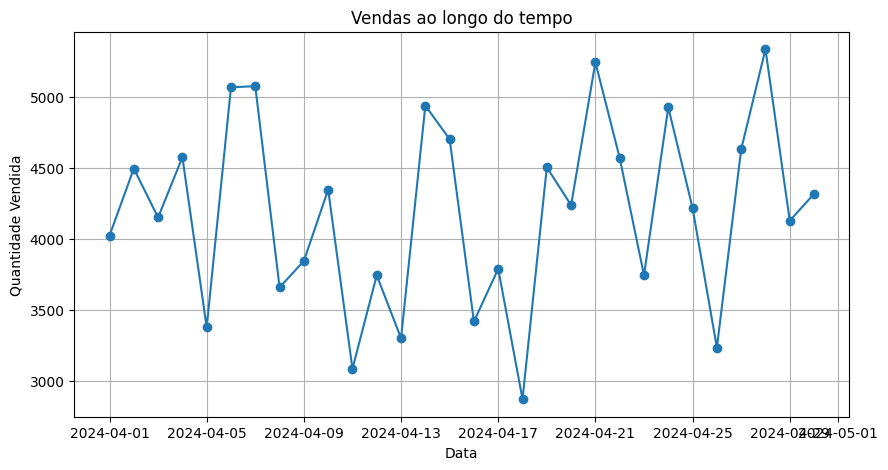


Análise de desempenho de produtos:
nome
Produto 1       4303
Produto 10      5315
Produto 100     7710
Produto 102    16733
Produto 103     1621
               ...  
Produto 95     10249
Produto 96      5323
Produto 97     16006
Produto 98     16523
Produto 99      9628
Name: valor_total, Length: 493, dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega o arquivo "data_warehouse.csv" em uma Dataframe
df_warehouse = pd.read_csv('data_warehouse.csv')

# Agrupa os dados contidos na dataframe "df_warehouse" pela coluna "nome", soma e printa os valores em "quantidade" e "valor_total".
vendas_por_produto = df_warehouse.groupby('nome') [['quantidade', 'valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

# Agrupa os dados contidos na dataframe "df_warehouse" pela coluna "categoria", soma e printa os valores em "quantidade" e "valor_total".
vendas_por_categoria = df_warehouse.groupby('categoria') [['quantidade', 'valor_total']].sum()
print("\nAnálise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Converte os dados para datetime, Agrupa os dados contidos na dataframe "df_warehouse" pela coluna "categoria", soma e printa os valores em "quantidade" e "valor_total".
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data') [['quantidade', 'valor_total']].sum()
print("\nAnálise de tendências temporais:")
print(vendas_por_data)

# Cria um gráfico baseado nos dados encontrados na variável "vendas_por_data"
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

# Soma os valores
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos:")
print(desempenho_produto)

In [9]:
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine

# Checa se tem uma pasta chamada "data_lake", e se não tem, cria uma pasta chamada "data_lake"
if not os.path.exists('data_lake'):
  os.makedirs('data_lake')

# Define a quantidade de arquivos e a quantidade de linhas por arquivo
num_files = 10
num_rows_per_file = 1000

# Cria uma lista vazia chamada "dfs"
dfs = []

# Faz com que o loop for repita até os 10 arquivos tenham os dados inseridos
for i in range(num_files):
  # Gera dados aleatórios nas colunas 1, 2 e 3
  data = {
      'coluna1': np.random.randint(0, 100, num_rows_per_file),
      'coluna2': np.random.randn(num_rows_per_file),
      'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
  }

  # Carrega os dados na variável "data" em uma DataFrame
  df = pd.DataFrame(data)

  # Converte os Dataframes nos arquivos .csv criados préviamente
  file_name = f'data_lake/dados_{i+1}.csv'
  df.to_csv(file_name, index=False)

  # Junta os nomes do arquivos e seus dataframes respectivos e df em uma lista
  dfs.append(df)

print("Dados do Data Lake gerados com sucesso!")

# Cria uma database chamada data_lake.db
# Estabelece uma conexão com o banco de dados SQLite chamado 'data_lake.db'
conn_string = 'sqlite:///data_lake.db'

# Cria o banco de dados
engine = create_engine(conn_string)

# Salva cada DataFrame no banco de dados SQLite como uma tabela separada, usando índices para garantir nomes únicos.
for i, df in enumerate(dfs, 1):
  table_name = f'dados_{i}'
  df.to_sql(table_name, engine, index=False)

Dados do Data Lake gerados com sucesso!


Primeiras linhas do DataFrame:
   coluna1   coluna2 coluna3
0       38  2.352920       C
1       78 -0.551708       A
2       76 -0.229725       C
3       88 -0.400735       C
4       79  0.150493       A

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do Dataframe:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     50.201000    -0.035879
std      28.812962     1.003107
min       0.000000    -3.646061
25%      25.000000    -0.692955
50%      52.000000    -0.041261
75%      75.250000     0.658535
max      99.000000     2.946041


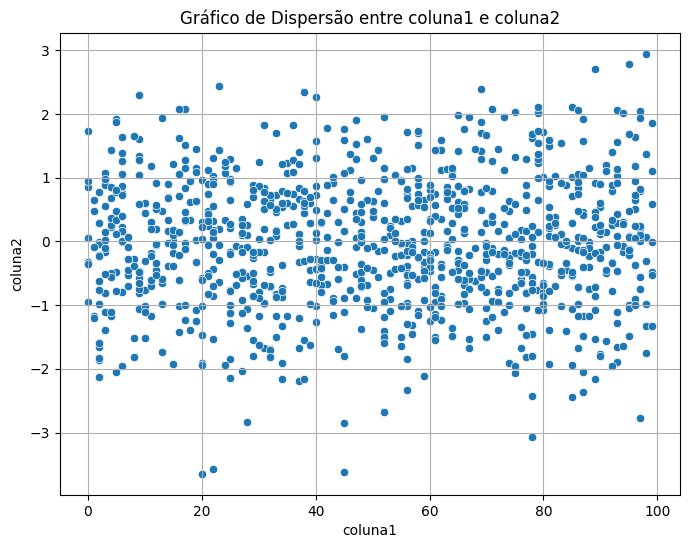

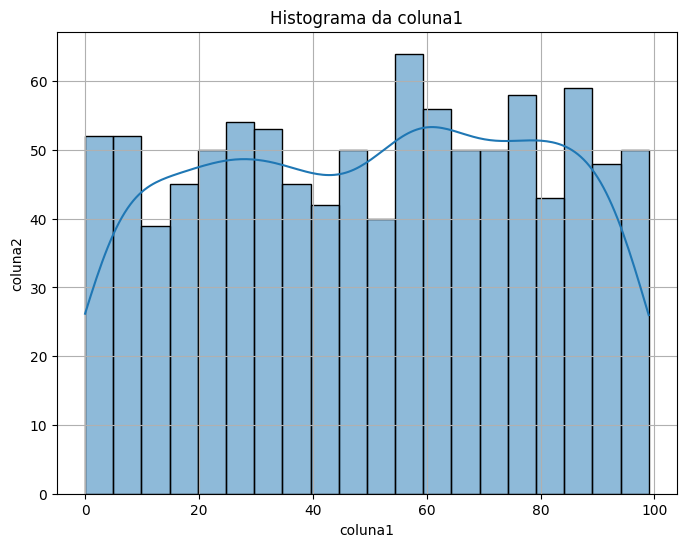

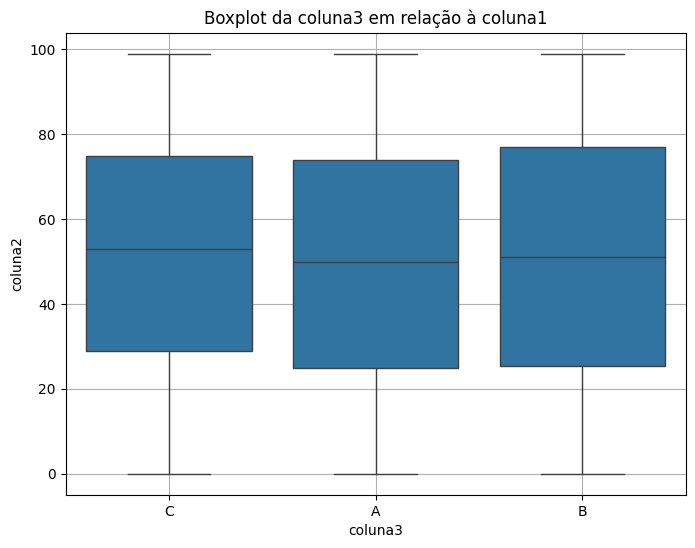

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Cria uma conexão com o banco de dados data_lake.db
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Carrega os dados da tabela "dados_1" em uma dataframe
table_name = 'dados_1' # Nome da tabela que será utilizada pra criar o dataframe
df = pd.read_sql_table(table_name, engine)

# Printa as primeiras linhas contidas no Dataframe
print("Primeiras linhas do DataFrame:")
print(df.head())

# Printa um Sumário do DataFrame
print("\nInformações sobre o DataFrame:")
print(df.info())

# Printa um resumo estatístico dos dados contidos no DataFrame, com média, desvio padrão mínimo e máximo, etc.
print("\nResumo estatístico do Dataframe:")
print(df.describe())

# Plota 3 Visualizações gráficas utilizando a livraria matplotlib baseada nas 3 colunas contidas dentro da variável "data"
# Plota um Gráfico de Dispersão utilizando a coluna1 como o eixo x e a coluna2 como o eixo y
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Gráfico de Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Plota um histograma entre as colunas 1 e 2
plt.figure(figsize=(8, 6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Plota um boxplot da coluna3 em relação à coluna1
plt.figure(figsize=(8, 6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação à coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()